In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [27]:
def CentralDerivative(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [32]:
x = sym.Symbol("x",Real=True)
function = 1/sym.sqrt(1+sym.exp(-x**2))
canonDerivative = (sym.exp(-x**2)*x)/(1+sym.exp(-x**2))**(3/2)

In [33]:
function

1/sqrt(1 + exp(-x**2))

In [34]:
canonDerivative

x*exp(-x**2)/(1 + exp(-x**2))**1.5

<IPython.core.display.Javascript object>


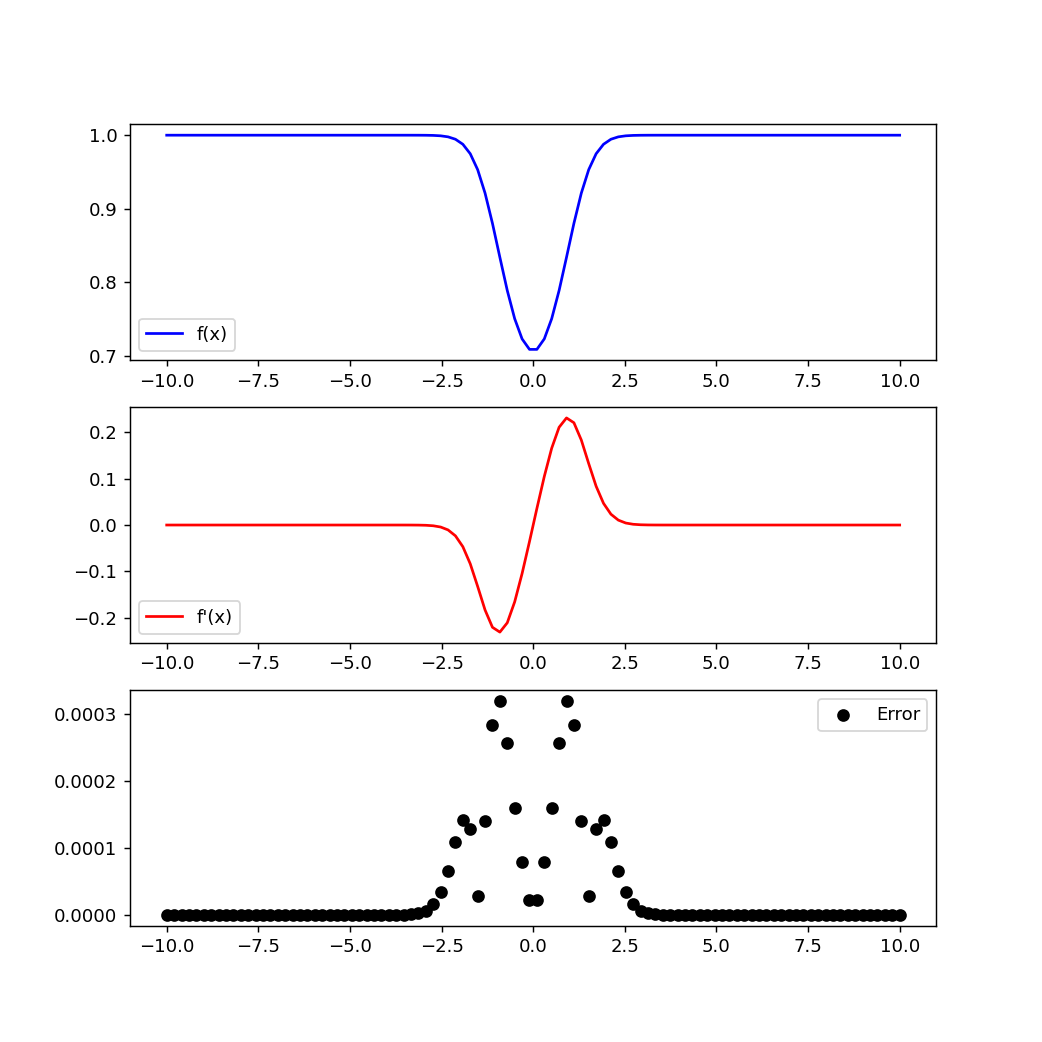

In [61]:
f = sym.lambdify([x],function,"numpy")
canonDyDx = sym.lambdify([x],canonDerivative,"numpy")
dom = np.linspace(-10,10,100)
y = f(dom)
dydx = CentralDerivative(f,dom,h=0.05)
DyDx = canonDyDx(dom)

fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(3,1,1)
ax1.plot(dom,y,color="b",label="f(x)")
ax1.legend(loc=3)

ax2 = fig.add_subplot(3,1,2)
ax2.plot(dom,dydx,color="r",label="f'(x)")
ax2.legend(loc=3)

ax3 = fig.add_subplot(3,1,3)
ax3.scatter(dom,np.abs(DyDx-dydx),c="#000000",label="Error")
ax3.legend(loc=1)